In [2]:
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

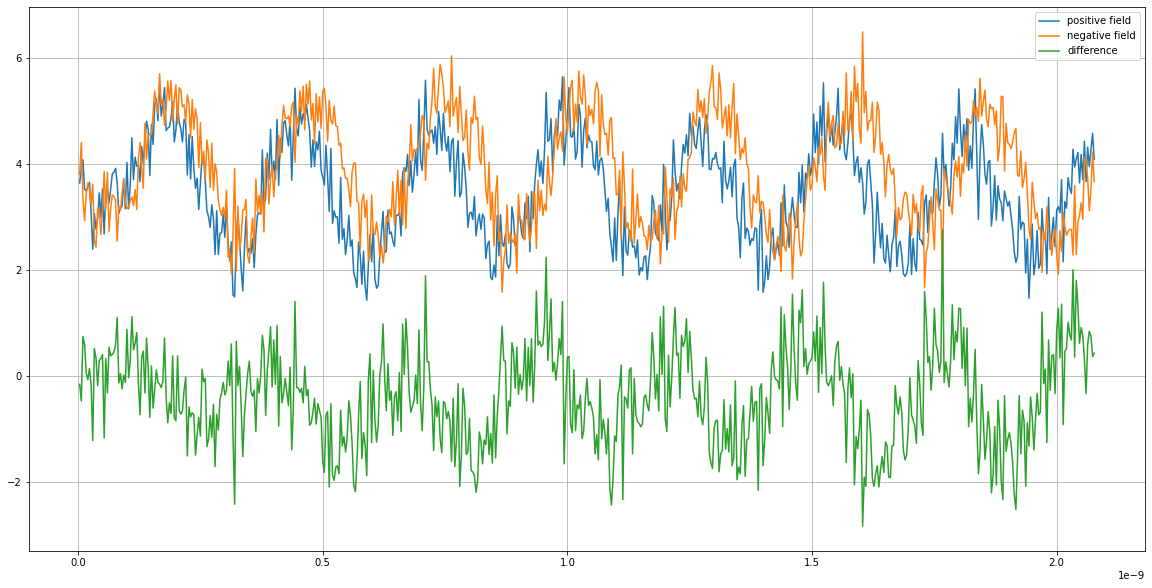

In [4]:
data_h_pos = np.loadtxt(r'data_exp/2022_09_06_Mlevy/positive_field1.dat')[:,:2]
data_h_pos[:, 0] = (data_h_pos[:, 0] - 178.78)*2/3/10**11
data_h_pos = data_h_pos[17:]
data_h_neg = np.loadtxt(r'data_exp/2022_09_06_Mlevy/negative_field1.dat')[:,:2]
data_h_neg[:, 0] = (data_h_neg[:, 0] - 178.78)*2/3/10**11
data_h_neg = data_h_neg[17:]

data_diff = data_h_pos[:, 1] - data_h_neg[:, 1]

plt.figure(figsize=(20, 10))
plt.plot(data_h_pos[:,0], data_h_pos[:,1], label='positive field')
plt.plot(data_h_neg[:,0], data_h_neg[:,1], label='negative field')
plt.plot(data_h_neg[:,0], data_diff, label='difference')
plt.legend()
plt.grid()

Maximums are:
    positive freq=3734693877.5508204, Amp=0.03776185723861952
    negative freq=3673469387.754905, Amp=0.04043490616741029
    differencs freq=3734693877.5508204, Amp=0.026062064632802504


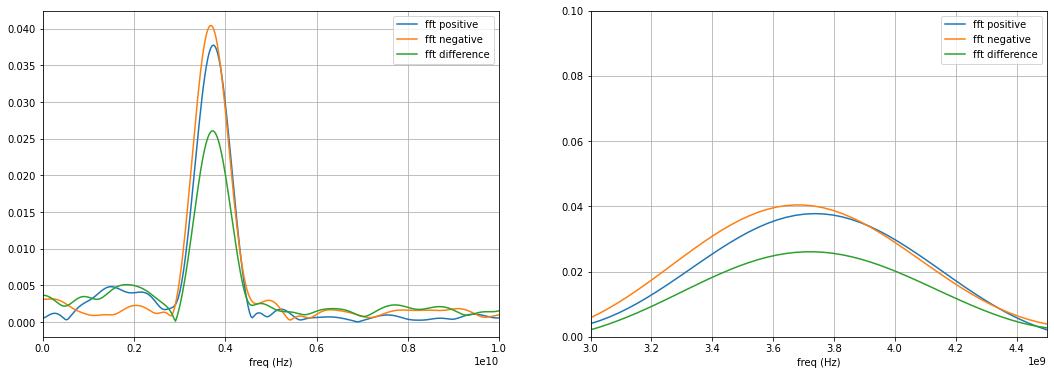

In [5]:
n = 10**4
w = np.bartlett(data_h_pos.shape[0])
# w=1
h_pos_fft = 2/n*np.abs(fft(w*(data_h_pos[:,1] - data_h_pos[:,1].mean()), n=n, ))
h_neg_fft = 2/n*np.abs(fft(w*(data_h_neg[:,1] - data_h_neg[:,1].mean()), n=n))
diff_fft = 2/n*np.abs(fft(w*(data_diff - data_diff.mean()), n=n))
freqs = fftfreq(n, data_h_pos[-1, 0]-data_h_pos[-2, 0], )


fig, ax = plt.subplots(1, 2, figsize=(18,6))

ax[0].plot(freqs[:n//2], h_pos_fft[:n//2], label='fft positive')
ax[0].plot(freqs[:n//2], h_neg_fft[:n//2], label='fft negative')
ax[0].plot(freqs[:n//2], diff_fft[:n//2], label='fft difference')
ax[0].set_xlim((0, 10**10))
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('freq (Hz)')

ax[1].plot(freqs[:n//2], h_pos_fft[:n//2], label='fft positive')
ax[1].plot(freqs[:n//2], h_neg_fft[:n//2], label='fft negative')
ax[1].plot(freqs[:n//2], diff_fft[:n//2], label='fft difference')
ax[1].set_xlim((0.3*10**10, 0.45*10**10))
ax[1].set_ylim((0, 0.1))
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('freq (Hz)')

l_idx = (freqs[:n//2] <= 3.4*10**9).sum()
r_idx = n//2 - (freqs[:n//2] >= 4*10**9).sum()
l_idx, r_idx
max_pos = np.where(h_pos_fft == h_pos_fft[l_idx:r_idx].max())[0][0]
max_neg = np.where(h_neg_fft == h_neg_fft[l_idx:r_idx].max())[0][0]
max_diff = np.where(diff_fft == diff_fft[l_idx:r_idx].max())[0][0]
print(f"""Maximums are:
    positive freq={freqs[max_pos]}, Amp={h_pos_fft[max_pos]}
    negative freq={freqs[max_neg]}, Amp={h_neg_fft[max_neg]}
    differencs freq={freqs[max_diff]}, Amp={diff_fft[max_diff]}""")

(array([3.73469388e+09, 1.86355984e+00, 3.25238397e+00, 3.24540573e+00]),
 array([ 3.66192008e+09, -1.14999744e+00,  5.69516148e-01,  3.50603406e+00]))

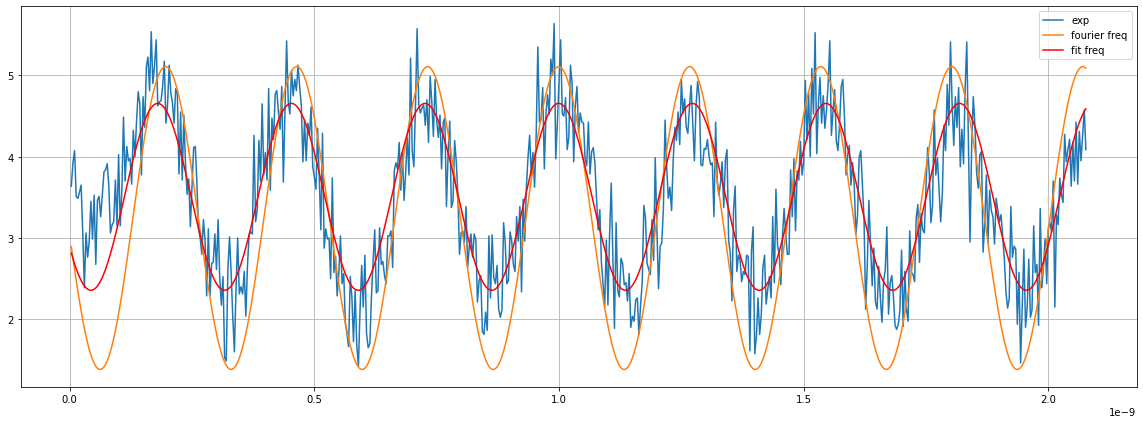

In [28]:
def fit_sine(x, freq, Amp, phase, shift):
    return Amp*np.sin(2*np.pi*freq*x + phase) + shift

p_opt, _ = curve_fit(fit_sine, data_h_pos[:, 0], data_h_pos[:, 1],
                 bounds=((freqs[max_pos]-1, 1, 0, 0 ), (freqs[max_pos], 3, 2*np.pi, 5)))
p_opt1, _ = curve_fit(fit_sine, data_h_pos[:, 0], data_h_pos[:, 1], p0=(freqs[max_pos], 1, 1, 1))

plt.figure(figsize=(20, 7))
plt.plot(data_h_pos[:,0], data_h_pos[:,1], label='exp')
plt.plot(data_h_pos[:,0], fit_sine(data_h_pos[:,0], *p_opt), label='fourier freq')
plt.plot(data_h_pos[:,0], fit_sine(data_h_pos[:,0], *p_opt1), 'r', label='fit freq')
plt.grid()
plt.legend()
p_opt, p_opt1

(array([3.67346939e+09, 1.56217470e+00, 3.02194938e+00, 3.40928598e+00]),
 array([3.60511542e+09, 1.26552681e+00, 3.38449810e+00, 3.92961773e+00]))

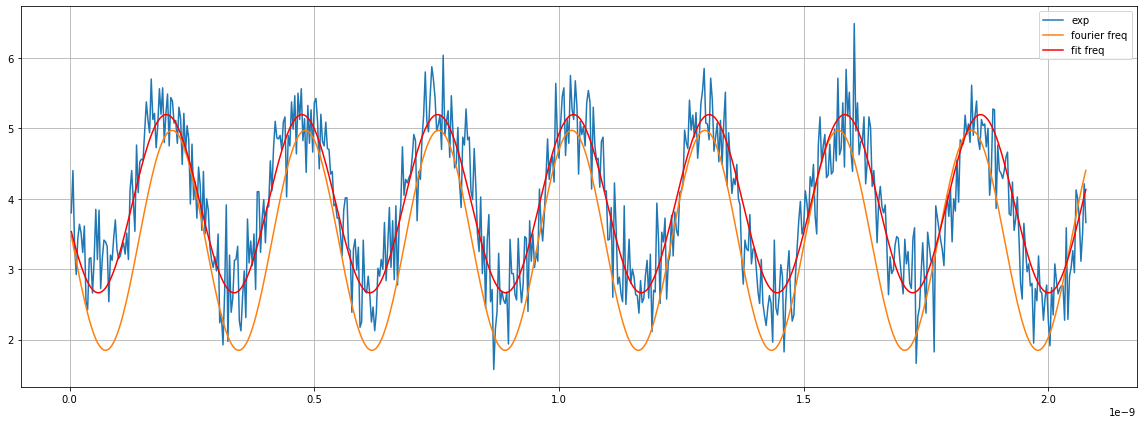

In [43]:
def fit_sine(x, freq, Amp, phase, shift):
    return Amp*np.sin(2*np.pi*freq*x + phase) + shift

p_opt, _ = curve_fit(fit_sine, data_h_neg[:, 0], data_h_neg[:, 1],
                 bounds=((freqs[max_neg]-1, 1, 0, 0 ), (freqs[max_neg], 3, 2*np.pi, 5)))
p_opt1, p_cov = curve_fit(fit_sine, data_h_neg[:, 0], data_h_neg[:, 1], p0=(freqs[max_pos], 1, 1, 1))

plt.figure(figsize=(20, 7))
plt.plot(data_h_neg[:,0], data_h_neg[:,1], label='exp')
plt.plot(data_h_neg[:,0], fit_sine(data_h_neg[:,0], *p_opt), label='fourier freq')
plt.plot(data_h_neg[:,0], fit_sine(data_h_neg[:,0], *p_opt1), 'r', label='fit freq')
plt.grid()
plt.legend()
p_opt, p_opt1